# Time Series Analysis

**Summary:**
The idea behind this analysis was to determine if we could forecast fake news. The dataset has news articles organized by the date of publication and the target would be the mean of news articles per day. Real news was assigned a value of 1 and fake news a value of 0. After preprocessing the data, grouping it into a daily index, and plotting a time series, it became clear that we were operating under flawed logic. The time series line did not show an objective measurement, such as the closing price of a stock, but rather showed the number of news articles gathered each day. All trends in the data could be explained by data scraping. Since Kaggle did not provide a data dictionary, we do not know how the data was collected. The first 6 months of the data set shows only fake news. This was a red flag that the data would not be reliable for a time series model. The absense of real news for the first 6 months of samples must be a result of data scraping. 

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from scipy import sparse

In [2]:
# To display all the rows and columns
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

### Data Imports

In [3]:
# Pull in the original Kaggle files, 
# which were combined in the data cleaning notebook
# Includes real and fake news
df = pd.read_csv('../datasets/news_data.csv.zip')

### Preprocessing the Data Frame

In the preprocessing step, I set the index to be the date and created a data frame called "daily" which grouped the news articles by each day and took the mean of the "is_true" target column.

In [4]:
# To see one row of data
df.head(1)

,title,text,date,is_true,domestic,title_word_count,text_word_count,title_uppercase_count,title_lowercase_count,title_all_letter_count,title_special_count,title_!,title_?,title_#,title_%,title_$,title_parentheses,text_uppercase_count,text_lowercase_count,text_all_letter_count,text_special_count,text_!,text_?,text_#,text_%,text_$,text_parentheses,rep
0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,0,1,12,332,64,0,64,0,0,0,0,0,0,0,56,1566,1622,1,0,1,0,0,0,0,0


In [5]:
# Checking the date data type
print('Date datatype: ', df.date.dtypes)

Date datatype:  object


In [6]:
# Converting the date data type from object to date/time
df['date'] = pd.to_datetime(df.date)
print('Date datatype: ', df.date.dtypes)

Date datatype:  datetime64[ns]


In [7]:
# Setting the date as the index
df.set_index('date', inplace=True)

In [8]:
# Confirming the index is a date/time
df.index[0]

Timestamp('2015-03-31 00:00:00')

In [9]:
# Sort the index oldest to newest
df.sort_index(inplace=True)

In [10]:
# Grouping the news stories by day
# 1 is real news; 0 is fake news
daily = df[['is_true']].resample('D').mean()

In [11]:
# Check null values for new column
daily['is_true'].isna().sum()

3

In [12]:
# Drop 3 null values
daily.dropna(inplace=True)
daily['is_true'].isna().sum()

0

### EDA and Modeling

In [13]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

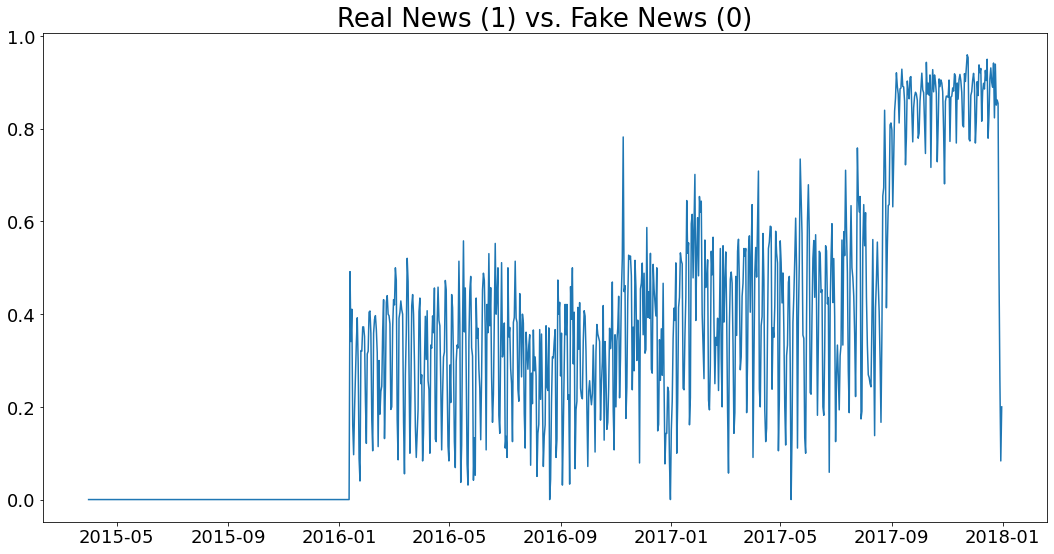

In [14]:
plot_series(daily, ['is_true'], title = 'Real News (1) vs. Fake News (0)')

The Line Series Plot shows the weight of news articles each day. A value closer to 1 indicates more real news on that day. Conversely, a value closer to 0 indicates more fake news on that day. The graph shows some concerning trends that ultimately caused me to abandon this analysis. The first 6 months of news articles are fake news. Additionally, the last 3 months of news articles are skewed to real news. These anamolies indicate that the pattern is most likely caused by data scraping. It's impossible that real news did not exist from May 2015 to January 2016. As a result, we cannot forecast future news with this model.

### Distribution of Sampling

The histograms below show the frequency of article collection over time. 

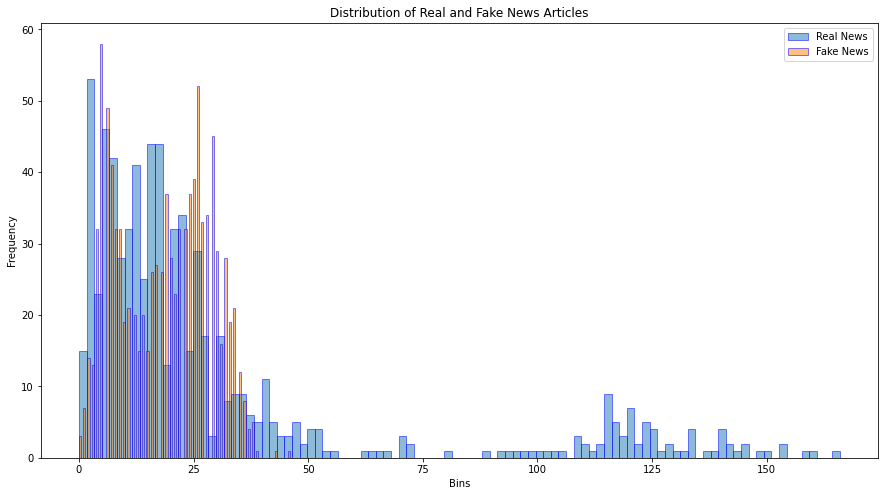

In [15]:
plt.figure(figsize=(15, 8))

true_mask = df[df['is_true'] == 1]
x = true_mask['is_true'].resample('D').count()
plt.hist(x, edgecolor='blue', alpha=0.5, bins= 100, label='Real News')

fake_mask = df[df['is_true'] == 0]
x = fake_mask['is_true'].resample('D').count()
plt.hist(x, edgecolor='blue', alpha=0.5, bins= 100, label='Fake News')

plt.legend(loc='upper right')
plt.title('Distribution of Real and Fake News Articles')
plt.xlabel('Bins')
plt.ylabel('Frequency');

### Line Plot - Sampling Over Time

The line plot below shows a similar tend to the time series analysis. The plot takes the net number of articles per day. If the line is negative then there were more fake news articles than real news articles on that day. 

''

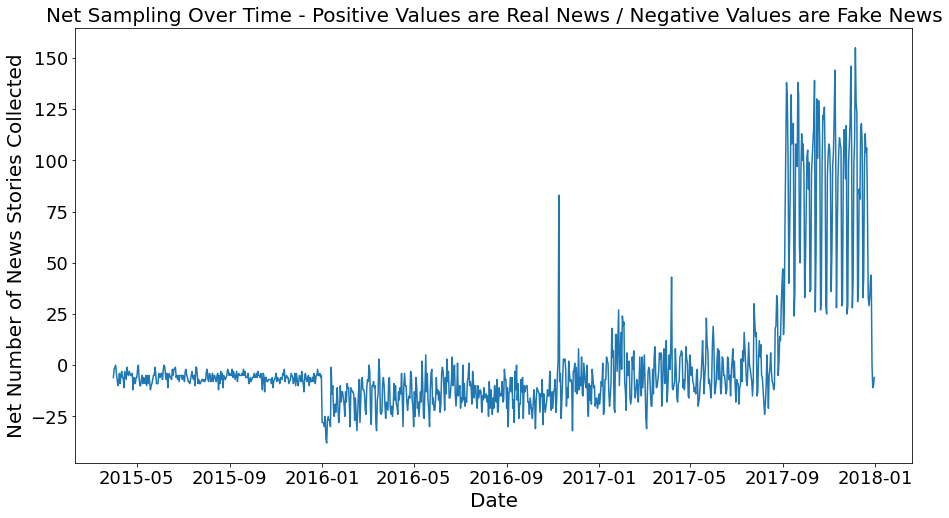

In [16]:
# Created a new column that assigned to take a sum
# Real news = 1
# Fake news = 0
df['binary'] = df['is_true'].map({0:-1,
                                 1:1})

# Grouped the news reports by day and added them together
balance = df[['binary']].resample('D').sum()

plt.figure(figsize=(15, 8))

plt.plot(balance['binary'])
plt.title('Net Sampling Over Time - Positive Values are Real News / Negative Values are Fake News', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Net Number of News Stories Collected', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);
